In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [50]:
def cohen_glass_hedges(x,y):
    nx = len(x)
    ny = len(y)
    pstdnmr = (nx-1)*x.var(ddof=1) + (ny-1)*y.var(ddof=1)   # (n-1)(var1+var2)
    pstddnm = nx + ny - 2                                   # (n-1)*2
    pstd = (pstdnmr / pstddnm)**(0.5)
    cohen = (x.mean() - y.mean()) / pstd
    glass = (x.mean() - y.mean()) / x.std(ddof=1)
    hedges = cohen * (1 - 3/(4 * (nx+ny) - 9) )             # cohen * (1-3/(8*n-9))
    return (cohen, glass, hedges)

In [2]:
m = pd.read_csv("measurements.csv")

In [3]:
m.sex.unique()

array(['f', 'm'], dtype=object)

In [4]:
m.sex.value_counts()

sex
m    50
f    30
Name: count, dtype: int64

In [5]:
mi = m[['ID', 'group', 'sex', 'birth_year', 'chol_init', 'trig_init', 'weight_init',
       'height_init', 'armspan_init', 'arm_perimeter_init', 'thorax_perimeter_init',
       'abdominal_perimeter_init', 'hip_perimeter_init', 'BMI_init', 
       'tricipital_fold_init', 'abdominal_fold_init', 'subscapular_fold_init']]

In [6]:
mf = m[['ID', 'group', 'sex', 'birth_year', 'chol_final', 'trig_final', 'weight_final',
       'height_final', 'armspan_final', 'arm_periemter_final', 'thorax_perimeter_final',
       'abdominal_perimeter_final', 'hip_perimeter_final', 'BMI_final', 
       'tricipital_fold_final', 'abdominal_fold_final', 'subscapular_fold_final']]

In [7]:
len(mi.columns)

17

In [8]:
len(mi.iloc[:,4:].columns.values)

13

In [9]:
melt_data_list = [pd.concat([mi.iloc[:,i], mf.iloc[:,i]]) for i in range(4,17)]

In [10]:
melt_data_list[12].shape

(160,)

In [11]:
mm = pd.DataFrame(index=range(160), columns=['ID', 'group', 'sex', 'time', 'birth_year', 'chol', 'trig', 'weight',
       'height', 'armspan', 'arm perimeter', 'thorax perimeter', 'abdominal perimeter', 'hip perimeter',
       'BMI', 'tricipital fold', 'abdominal fold', 'subscapular fold'])

In [12]:
mm.shape

(160, 18)

In [13]:
mm.loc[0:79, ['ID', 'group', 'sex', 'birth_year']] = m.loc[:, ['ID', 'group', 'sex', 'birth_year']]

In [14]:
mm.loc[80:159, ['ID', 'group', 'sex', 'birth_year']] = mm.loc[0:79, ['ID', 'group', 'sex', 'birth_year']].values

In [15]:
mm.loc[0:79, 'time'] = 'pre-treatment'

In [16]:
mm.loc[80:159, 'time'] = 'post-treatment'

In [17]:
for i in range(13):
    mm.iloc[:, i+5] = melt_data_list[i]

In [18]:
mm.columns

Index(['ID', 'group', 'sex', 'time', 'birth_year', 'chol', 'trig', 'weight',
       'height', 'armspan', 'arm perimeter', 'thorax perimeter',
       'abdominal perimeter', 'hip perimeter', 'BMI', 'tricipital fold',
       'abdominal fold', 'subscapular fold'],
      dtype='object')

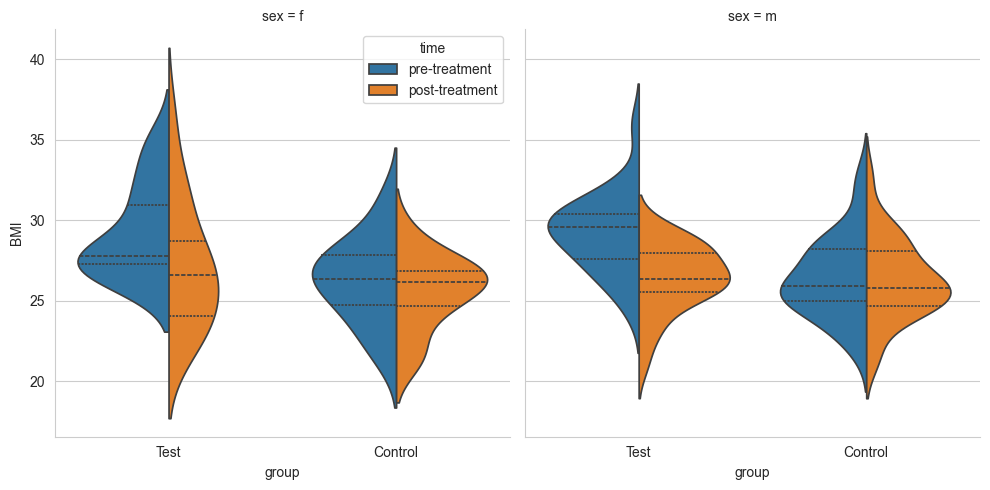

In [19]:
sns.set_style("whitegrid")
sns.catplot(data=mm, x='group', y='BMI', hue='time', col='sex', 
            kind='violin', split=True, sharey=True, legend_out=False, inner="quart")
#plt.savefig('BMI-catplot.svg')
#plt.savefig('BMI-catplot.pdf')

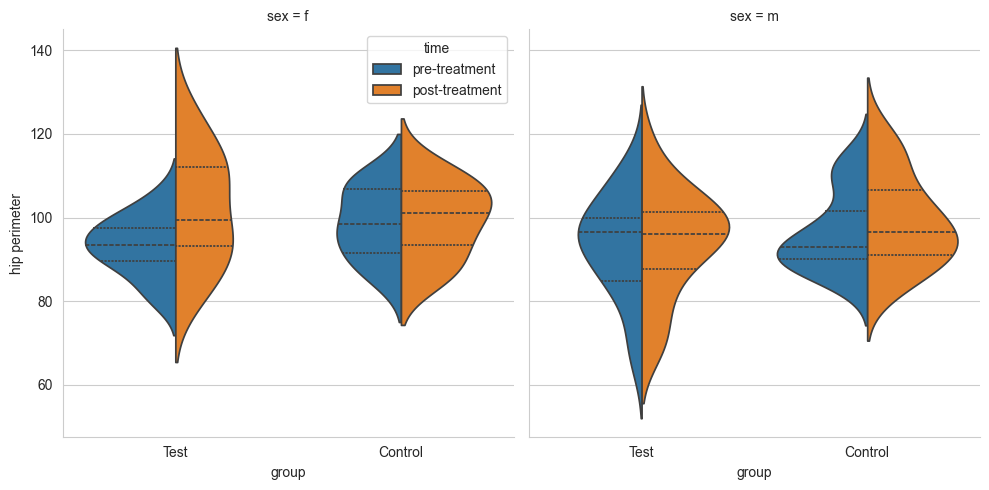

In [20]:
sns.set_style("whitegrid")
sns.catplot(data=mm, x='group', y='hip perimeter', hue='time', col='sex', 
            kind='violin', split=True, sharey=True, legend_out=False, inner="quart")
#plt.savefig('hip-catplot.svg')
#plt.savefig('hip-catplot.pdf')

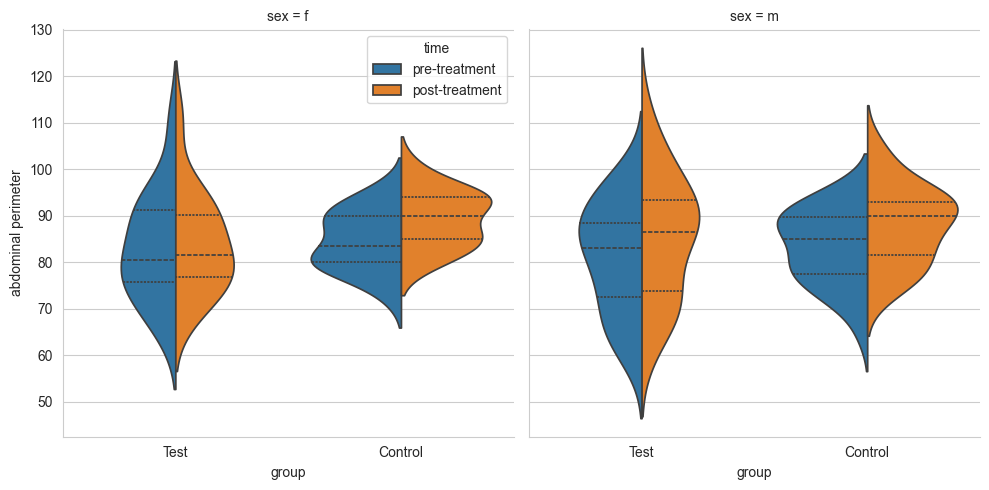

In [21]:
sns.set_style("whitegrid")
sns.catplot(data=mm, x='group', y='abdominal perimeter', hue='time', col='sex', 
            kind='violin', split=True, sharey=True, legend_out=False, inner="quart")
#plt.savefig('abd-catplot.svg')
#plt.savefig('abd-catplot.pdf')

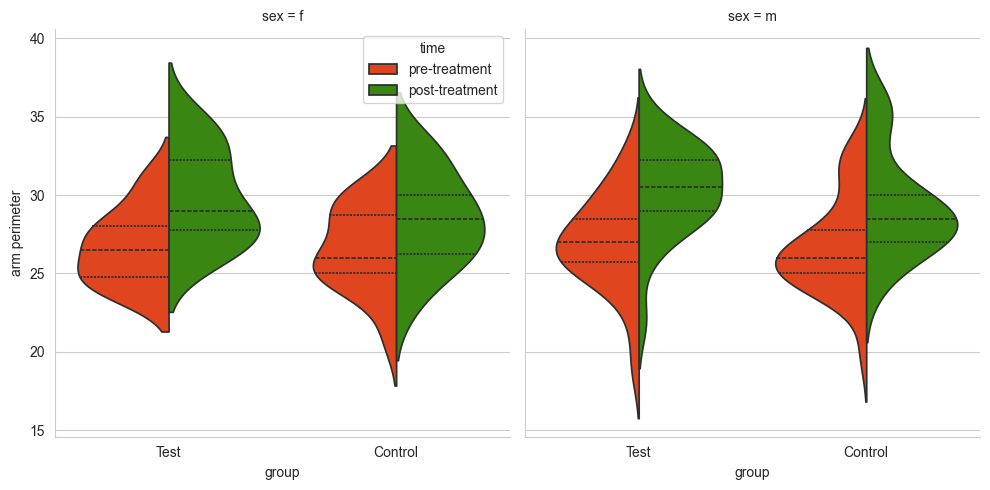

In [22]:
sns.set_style("whitegrid")
sns.catplot(data=mm, x='group', y='arm perimeter', hue='time', col='sex', palette = 'blend:#F30,#390',
            kind='violin', split=True, sharey=True, legend_out=False, inner="quart")
#plt.savefig('arm-catplot.svg')
#plt.savefig('arm-catplot.pdf')

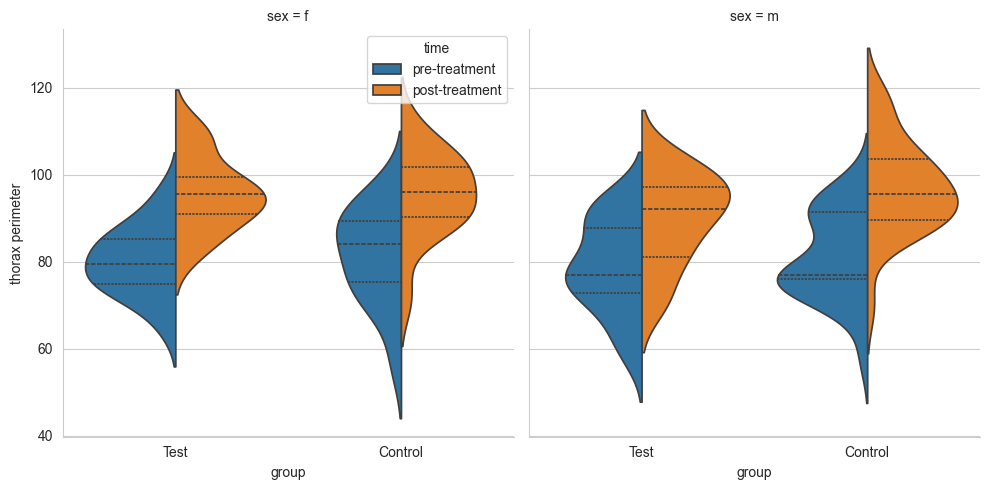

In [23]:
sns.set_style("whitegrid")
sns.catplot(data=mm, x='group', y='thorax perimeter', hue='time', col='sex', 
            kind='violin', split=True, sharey=True, legend_out=False, inner="quart")
#plt.savefig('thx-catplot.svg')
#plt.savefig('thx-catplot.pdf')

In [24]:
m.columns

Index(['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

<Axes: xlabel='sex', ylabel='BMI_diff'>

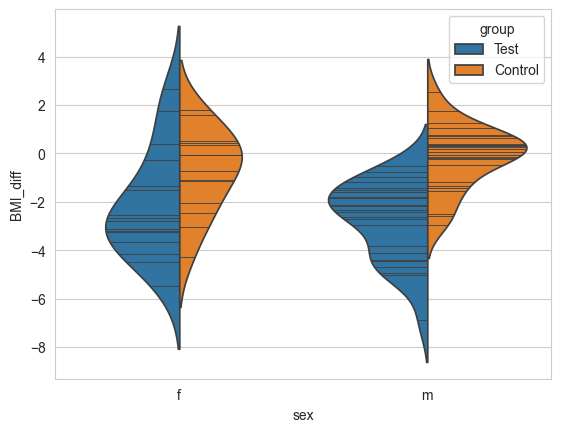

In [25]:
sns.set_style("whitegrid")
sns.violinplot(data=m, x='sex', y="BMI_diff", hue='group', split=True, inner='stick', fill=True)

<Axes: xlabel='sex', ylabel='arm_perimeter_diff'>

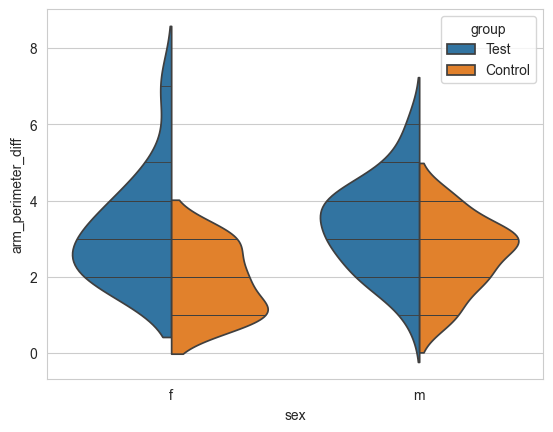

In [26]:
sns.set_style("whitegrid")
sns.violinplot(data=m, x='sex', y="arm_perimeter_diff", hue='group', split=True, inner='stick', fill=True)

<Axes: xlabel='sex', ylabel='thorax_perimeter_diff'>

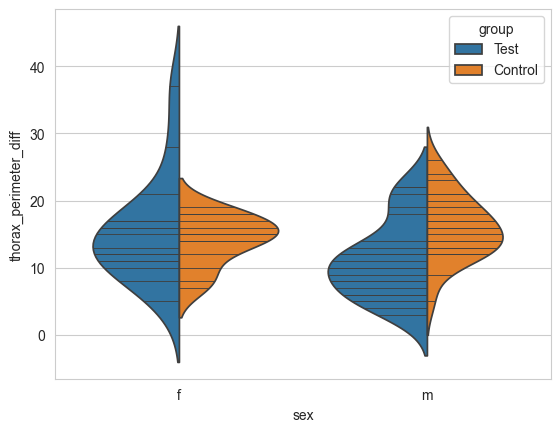

In [27]:
sns.set_style("whitegrid")
sns.violinplot(data=m, x='sex', y="thorax_perimeter_diff", hue='group', split=True, inner='stick', fill=True)

<Axes: xlabel='sex', ylabel='abdominal_perimeter_diff'>

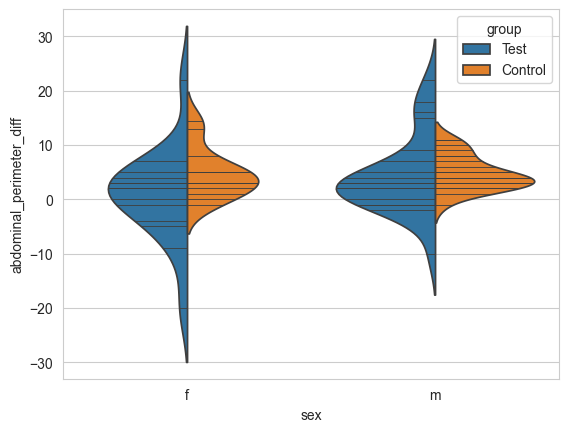

In [28]:
sns.set_style("whitegrid")
sns.violinplot(data=m, x='sex', y="abdominal_perimeter_diff", hue='group', split=True, inner='stick', fill=True)

<Axes: xlabel='sex', ylabel='hip_perimeter_diff'>

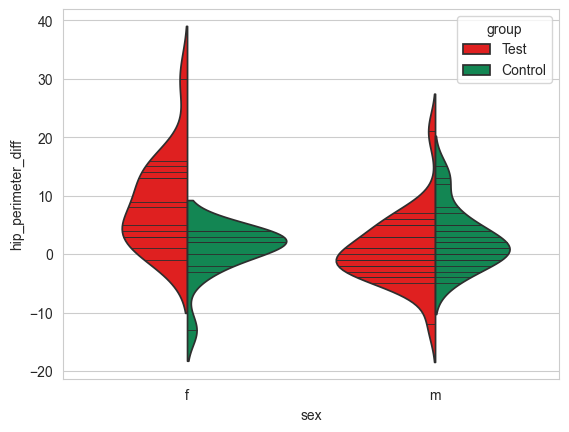

In [29]:
sns.set_style("whitegrid")
sns.violinplot(data=m, x='sex', y="hip_perimeter_diff", hue='group', split=True, inner='stick', fill=True, palette='blend:#F00,#095')

In [30]:
m.loc[:19,['tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
tricipital_fold_final,23.0,23.0,11.0,18.0,10.0,28.0,10.0,20.0,30.0,30.0,20.0,31.0,31.0,13.0,42.0,10.0,10.0,36.0,30.0,0.8
tricipital_fold_init,19.0,23.0,20.0,20.0,31.0,19.0,20.0,21.0,20.0,20.0,40.0,28.0,20.0,12.0,28.0,29.0,30.0,21.0,21.0,18.0
abdominal_fold_final,19.0,40.0,26.0,10.0,19.0,40.0,0.8,10.0,33.0,38.0,11.0,43.0,48.0,0.9,40.0,0.3,0.9,40.0,40.0,0.1
abdominal_fold_init,19.0,42.0,20.0,40.0,31.0,42.0,50.0,10.0,50.0,29.0,30.0,41.0,30.0,22.0,46.0,31.0,40.0,43.0,31.0,10.0
subscapular_fold_final,10.0,20.0,22.0,0.9,0.8,28.0,0.8,11.0,21.0,30.0,11.0,33.0,40.0,10.0,30.0,0.1,0.7,48.0,22.0,0.1
subscapular_fold_init,10.0,17.0,20.0,12.0,21.0,21.0,30.0,7.0,29.0,10.0,20.0,32.0,12.0,10.0,30.0,32.0,38.0,30.0,30.0,3.0


In [31]:
m.loc[20:39,['tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init']].T

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
tricipital_fold_final,12.0,39.0,26.0,30.0,0.8,20.0,26.0,12.0,33.0,13.0,21.0,40.0,10.0,21.0,13.0,36.0,30.0,20.0,28.0,10.0
tricipital_fold_init,14.0,21.0,30.0,18.0,21.0,23.0,21.0,48.0,27.0,20.0,20.0,30.0,2.0,10.0,30.0,20.0,24.0,22.0,40.0,39.0
abdominal_fold_final,0.3,42.0,20.0,30.0,0.3,30.0,43.0,20.0,38.0,20.0,31.0,32.0,0.3,30.0,32.0,48.0,40.0,19.0,42.0,16.0
abdominal_fold_init,20.0,48.0,40.0,33.0,31.0,38.0,40.0,50.0,40.0,30.0,49.0,40.0,3.0,9.0,31.0,40.0,39.0,29.0,50.0,50.0
subscapular_fold_final,0.8,30.0,12.0,28.0,0.1,20.0,32.0,10.0,30.0,10.0,11.0,29.0,0.3,29.0,40.0,31.0,30.0,0.8,28.0,18.0
subscapular_fold_init,11.0,30.0,30.0,19.0,21.0,21.0,19.0,42.0,30.0,10.0,30.0,20.0,3.0,1.0,30.0,21.0,22.0,28.0,60.0,40.0


In [32]:
np.sort(m.loc[:39,['tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init']].agg(['value_counts']).index.values)

array([ 0.1,  0.3,  0.7,  0.8,  0.9,  1. ,  2. ,  3. ,  7. ,  9. , 10. ,
       11. , 12. , 13. , 14. , 16. , 17. , 18. , 19. , 20. , 21. , 22. ,
       23. , 24. , 26. , 27. , 28. , 29. , 30. , 31. , 32. , 33. , 36. ,
       38. , 39. , 40. , 41. , 42. , 43. , 46. , 48. , 49. , 50. , 60. ])

In [33]:
mtr = m.loc[(m.tricipital_fold_final>5) & (m.tricipital_fold_init>5), ['ID', 'sex', 'tricipital_fold_final', 'tricipital_fold_init']]
mab = m.loc[(m.abdominal_fold_final>5) & (m.abdominal_fold_init>5), ['ID', 'sex', 'abdominal_fold_final', 'abdominal_fold_init']]
mss = m.loc[(m.subscapular_fold_final>5) & (m.subscapular_fold_init>5), ['ID', 'sex', 'subscapular_fold_final', 'subscapular_fold_init']]

In [34]:
st.ttest_rel(mtr.iloc[:,3], mtr.iloc[:,2])

TtestResult(statistic=0.5317248531400467, pvalue=0.5981827435707495, df=36)

In [35]:
st.ttest_rel(mab.iloc[:,3], mab.iloc[:,2])

TtestResult(statistic=2.341408362933918, pvalue=0.025815986203312415, df=31)

In [36]:
st.ttest_rel(mss.iloc[:,3], mss.iloc[:,2])

TtestResult(statistic=0.09185456821902419, pvalue=0.9274676213111548, df=28)

In [51]:
cohen_glass_hedges(mtr.iloc[:,3], mtr.iloc[:,2])

(0.1309140460160371, 0.145722250707027, 0.12954560651064298)

In [52]:
cohen_glass_hedges(mab.iloc[:,3], mab.iloc[:,2])

(0.47615233413339675, 0.48693008344659877, 0.4703691074030316)

In [53]:
cohen_glass_hedges(mss.iloc[:,3], mss.iloc[:,2])

(0.02206483997527323, 0.021150739124953875, 0.021768003563049823)

In [54]:
st.levene(mtr.iloc[:,3], mtr.iloc[:,2])

LeveneResult(statistic=3.8247967479674805, pvalue=0.054380233986975425)

In [55]:
st.levene(mab.iloc[:,3], mab.iloc[:,2])

LeveneResult(statistic=0.5389285291914693, pvalue=0.46564441983695704)

In [68]:
st.levene(mss.iloc[:,3], mss.iloc[:,2])

LeveneResult(statistic=0.001221560543594431, pvalue=0.9722432344096915)

In [37]:
mtr.columns = ['ID', 'sex', 'final tricipital fold', 'initial tricipital fold']

In [38]:
mab.columns = ['ID', 'sex', 'final abdominal fold', 'initial abdominal fold']

In [39]:
mss.columns = ['ID', 'sex', 'final subscapular fold', 'initial subscapular fold']

In [40]:
mmtr = mtr.melt(id_vars=['ID', 'sex'], value_vars=['initial tricipital fold','final tricipital fold'],
         var_name='time', value_name='tricipital fold')
mmab = mab.melt(id_vars=['ID', 'sex'], value_vars=['initial abdominal fold','final abdominal fold'],
         var_name='time', value_name='abdominal fold')
mmss = mss.melt(id_vars=['ID', 'sex'], value_vars=['initial subscapular fold','final subscapular fold'],
         var_name='time', value_name='subscapular fold')

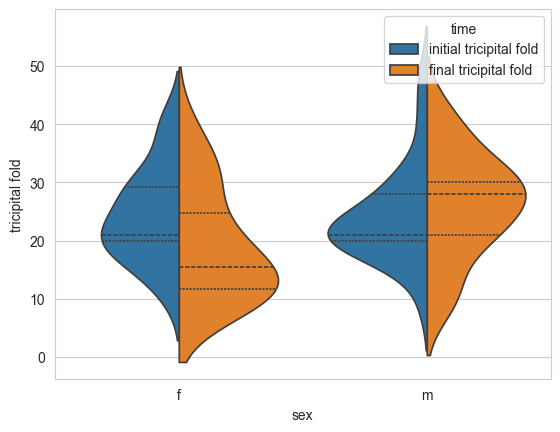

In [58]:
sns.violinplot(data=mmtr, x='sex', y='tricipital fold', hue='time', split=True, inner='quart')
#plt.savefig('tri-catplot.svg')
#plt.savefig('tri-catplot.pdf')

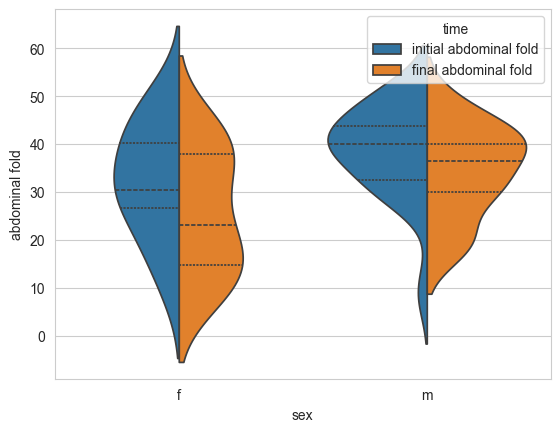

In [59]:
sns.violinplot(data=mmab, x='sex', y='abdominal fold', hue='time', split=True, inner='quart')
#plt.savefig('abdf-catplot.svg')
#plt.savefig('abdf-catplot.pdf')

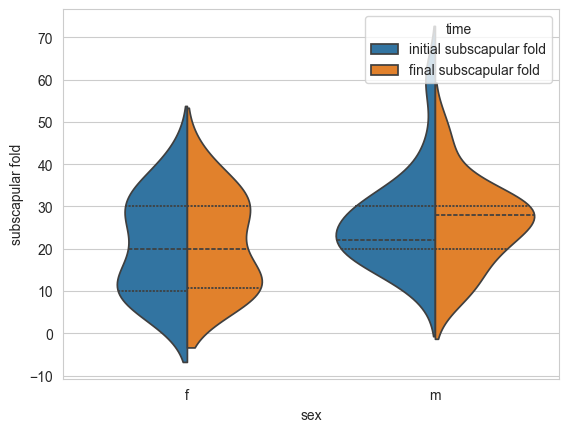

In [60]:
sns.violinplot(data=mmss, x='sex', y='subscapular fold', hue='time', split=True, inner='quart')
#plt.savefig('ss-catplot.svg')
#plt.savefig('ss-catplot.pdf')

In [44]:
m.loc[:39,['weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init']].agg(['count', 'median', 'mean', 'min', 'max', 'std', 'var',
    lambda x: st.kurtosis(x.copy()), lambda y: st.skew(y.copy()), lambda z: st.shapiro(z)[0],
                                      lambda z: st.shapiro(z)[1]]).T.round(2).head()

,count,median,mean,min,max,std,var,<lambda>,<lambda>,<lambda>,<lambda>
weight_init,40.0,67.45,66.93,48.7,90.8,10.44,108.95,-0.20,0.36,0.97,0.39
weight_final,40.0,70.15,69.99,54.1,101.0,11.60,134.63,0.28,0.63,0.94,0.03
weight_diff,40.0,3.75,3.06,-6.6,12.8,4.34,18.88,-0.45,-0.08,0.99,0.96
height_init,40.0,150.50,150.93,134.0,169.0,7.93,62.84,-0.32,0.05,0.98,0.79
height_final,40.0,161.00,161.50,144.0,176.0,7.78,60.51,-0.74,-0.31,0.97,0.38


In [45]:
md = m[['ID', 'group', 'sex', 'birth_year', 'weight_diff', 'height_diff', 'armspan_diff', 'BMI_diff',
       'arm_perimeter_diff', 'thorax_perimeter_diff', 'abdominal_perimeter_diff', 'hip_perimeter_diff']]

In [46]:
md.columns

Index(['ID', 'group', 'sex', 'birth_year', 'weight_diff', 'height_diff',
       'armspan_diff', 'BMI_diff', 'arm_perimeter_diff',
       'thorax_perimeter_diff', 'abdominal_perimeter_diff',
       'hip_perimeter_diff'],
      dtype='object')

In [67]:
md.columns[7:]

Index(['BMI_diff', 'arm_perimeter_diff', 'thorax_perimeter_diff',
       'abdominal_perimeter_diff', 'hip_perimeter_diff'],
      dtype='object')

In [47]:
[st.ttest_ind(md[col].loc[m.group=='Test'], md[col].loc[m.group=='Control']) for col in md.columns[7:]]

[TtestResult(statistic=-5.659363194233141, pvalue=2.416177697846359e-07, df=78.0),
 TtestResult(statistic=3.8147002483152086, pvalue=0.00027131283633402846, df=78.0),
 TtestResult(statistic=-1.8494538746787232, pvalue=0.06818044500082482, df=78.0),
 TtestResult(statistic=-1.307425396940619, pvalue=0.19490909211439533, df=78.0),
 TtestResult(statistic=1.3533342532291002, pvalue=0.179858039267444, df=78.0)]

In [49]:
[cohen_glass_hedges(md[col].loc[md.group=='Test'], md[col].loc[md.group=='Control'])[0] for col in md.columns[7:]]

[-1.2654720811665647,
 0.8529929069018134,
 -0.4135504585032002,
 -0.292349206306887,
 0.3026147386499182]

In [56]:
[st.levene(md[col].loc[md.group=='Test'], md[col].loc[md.group=='Control']) for col in md.columns[7:]]

[LeveneResult(statistic=1.7009784784384476, pvalue=0.1959956156535377),
 LeveneResult(statistic=0.36662749706228026, pvalue=0.546606144233884),
 LeveneResult(statistic=2.818824285255382, pvalue=0.09716664563522683),
 LeveneResult(statistic=4.381034167470445, pvalue=0.03959139818918544),
 LeveneResult(statistic=4.9404760161113135, pvalue=0.029130754109695386)]

In [62]:
st.shapiro(m['BMI_init'].loc[m.group=='Test'])

ShapiroResult(statistic=0.9584978845393177, pvalue=0.1487803123806828)

In [69]:
m.columns

Index(['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

In [72]:
m[['ID', 'group', 'sex', 'weight_init', 'weight_final', 'height_init', 'height_final', 
       'armspan_init', 'armspan_final', 'BMI_init', 'BMI_final',
       'arm_perimeter_init', 'arm_periemter_final',
       'thorax_perimeter_init', 'thorax_perimeter_final',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'hip_perimeter_init', 'hip_perimeter_final',]].head()

,ID,group,sex,weight_init,weight_final,height_init,height_final,armspan_init,armspan_final,BMI_init,BMI_final,arm_perimeter_init,arm_periemter_final,thorax_perimeter_init,thorax_perimeter_final,abdominal_perimeter_init,abdominal_perimeter_final,hip_perimeter_init,hip_perimeter_final
0,t1,Test,f,69.5,69.0,158,166.0,145.0,159,27.840090,25.039919,25,27,71,92,80.0,79,86,85
1,t2,Test,m,70.0,71.9,157,167.0,155.0,162,28.398718,25.780774,30,34,90,97,96.0,86,103,101
2,t3,Test,f,66.8,74.5,156,169.0,152.5,167,27.449047,26.084521,24,28,75,91,72.0,75,88,91
3,t4,Test,f,63.1,70.2,151,160.0,157.0,164,27.674225,27.421875,27,31,84,101,91.0,95,94,103
4,t5,Test,m,57.9,63.2,146,154.0,152.3,157,27.162695,26.648676,22,26,63,72,63.0,66,75,72


In [142]:
t_mean_of_c_diff = m.loc[:, ['weight_init', 'weight_final', 'height_init', 'height_final', 
       'armspan_init', 'armspan_final', 'BMI_init', 'BMI_final',
       'arm_perimeter_init', 'arm_periemter_final',
       'thorax_perimeter_init', 'thorax_perimeter_final',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'hip_perimeter_init', 'hip_perimeter_final']].apply(lambda x: x.loc[m.group=='Test'] - x.loc[m.group=='Control'].mean()).copy()

In [143]:
[t_mean_of_c_diff.insert(i, m.columns[i], m.iloc[:40, i]) for i in range(3)]

[None, None, None]

In [146]:
t_mean_of_c_diff.head()

,ID,group,sex,weight_init,weight_final,height_init,height_final,armspan_init,armspan_final,BMI_init,BMI_final,arm_perimeter_init,arm_periemter_final,thorax_perimeter_init,thorax_perimeter_final,abdominal_perimeter_init,abdominal_perimeter_final,hip_perimeter_init,hip_perimeter_final
0,t1,Test,f,2.2275,-5.33,-1.4,-2.7475,-10.8625,-7.375,1.454201,-0.987010,-1.675,-2.0,-10.175,-4.525,-3.7375,-9.5,-11.25,-14.175
1,t2,Test,m,2.7275,-2.43,-2.4,-1.7475,-0.8625,-4.375,2.012830,-0.246155,3.325,5.0,8.825,0.475,12.2625,-2.5,5.75,1.825
2,t3,Test,f,-0.4725,0.17,-3.4,0.2525,-3.3625,0.625,1.063158,0.057592,-2.675,-1.0,-6.175,-5.525,-11.7375,-13.5,-9.25,-8.175
3,t4,Test,f,-4.1725,-4.13,-8.4,-8.7475,1.1375,-2.375,1.288336,1.394946,0.325,2.0,2.825,4.475,7.2625,6.5,-3.25,3.825
4,t5,Test,m,-9.3725,-11.13,-13.4,-14.7475,-3.5625,-9.375,0.776806,0.621747,-4.675,-3.0,-18.175,-24.525,-20.7375,-22.5,-22.25,-27.175


In [147]:
m.columns[4].endswith('_init')

True

In [154]:
init_cols = [col for col in t_mean_of_c_diff.columns if col.endswith('_init')]
final_cols = [col for col in t_mean_of_c_diff.columns if col.endswith('_final')]

In [155]:
tmocd_init = t_mean_of_c_diff.melt(id_vars=['ID', 'group', 'sex'], value_vars=init_cols,
                                   var_name='param', value_name='value')

In [156]:
tmocd_final = t_mean_of_c_diff.melt(id_vars=['ID', 'group', 'sex'], value_vars=final_cols,
                                   var_name='param', value_name='value')

In [157]:
tmocd_init['time'] = 'init'
tmocd_final['time'] = 'final'

In [159]:
tmocd_melted = pd.concat([tmocd_init, tmocd_final])

In [160]:
tmocd_melted

,ID,group,sex,param,value,time
0,t1,Test,f,weight_init,2.2275,init
1,t2,Test,m,weight_init,2.7275,init
2,t3,Test,f,weight_init,-0.4725,init
3,t4,Test,f,weight_init,-4.1725,init
4,t5,Test,m,weight_init,-9.3725,init
...,...,...,...,...,...,...
315,t36,Test,m,hip_perimeter_final,11.8250,final
316,t37,Test,m,hip_perimeter_final,-19.1750,final
317,t38,Test,m,hip_perimeter_final,-17.1750,final
318,t39,Test,m,hip_perimeter_final,7.8250,final


In [181]:
m.group.str[0] # String acessor. Only works for Series, not DataFrame or element. 
# Indexing provides a pd series containing first letter of each series element

0     T
1     T
2     T
3     T
4     T
     ..
75    C
76    C
77    C
78    C
79    C
Name: group, Length: 80, dtype: object

In [182]:
tmocd_melted['param'] = tmocd_melted['param'].str.replace('_init', '').str.replace('_final', '')

In [193]:
tmocd_melted['param'] = tmocd_melted['param'].str.replace('arm_periemter', 'arm_perimeter')

In [194]:
tmocd_melted.pivot_table(index=['ID', 'group', 'sex', 'time'], columns='param', values='value')

param                     BMI  abdominal_perimeter  arm_perimeter  armspan  \
ID  group sex time                                                           
t1  Test  f   final -0.987010              -9.5000         -2.000  -7.3750   
              init   1.454201              -3.7375         -1.675 -10.8625   
t10 Test  f   final -1.859766              -5.5000         -1.000  -5.3750   
              init   0.452759              -2.7375         -0.675   1.1375   
t11 Test  f   final  1.149924              -2.5000          0.000  -4.3750   
...                       ...                  ...            ...      ...   
t7  Test  m   init  -0.559068               4.2625         -0.675  -6.8625   
t8  Test  f   final -3.820598              -8.5000          4.000   5.6250   
              init   1.303000              -8.7375          1.325   5.1375   
t9  Test  m   final  1.941087              13.5000          4.000   6.6250   
              init   3.734098              16.2625          1.325   5.1375   

param                 height  hip_perimeter  thorax_perimeter   weight  
ID  group sex time                                                      
t1  Test  f   final  -2.7475        -14.175            -4.525  -5.3300  
              init   -1.4000        -11.250           -10.175   2.2275  
t10 Test  f   final  -4.7475         -3.175            -3.525  -9.3300  
              init   -1.4000         -4.250             0.825  -0.2725  
t11 Test  f   final   3.2525         12.825            13.475   6.0700  
...                      ...            ...               ...      ...  
t7  Test  m   init  -20.4000         -0.250            -4.175 -17.3725  
t8  Test  f   final  -5.7475         15.825            -0.525 -15.3300  
              init   -9.4000          3.750             4.825  -4.9725  
t9  Test  m   final  -1.7475          0.825             1.475   3.6700  
              init   -3.4000         -0.250            11.825   6.0275  

[80 rows x 8 columns]

In [195]:
tmocd_melted.pivot_table(index=['ID', 'group', 'sex', 'time'], columns='param', values='value').reset_index()

param,ID,group,sex,time,BMI,abdominal_perimeter,arm_perimeter,armspan,height,hip_perimeter,thorax_perimeter,weight
0,t1,Test,f,final,-0.987010,-9.5000,-2.000,-7.3750,-2.7475,-14.175,-4.525,-5.3300
1,t1,Test,f,init,1.454201,-3.7375,-1.675,-10.8625,-1.4000,-11.250,-10.175,2.2275
2,t10,Test,f,final,-1.859766,-5.5000,-1.000,-5.3750,-4.7475,-3.175,-3.525,-9.3300
3,t10,Test,f,init,0.452759,-2.7375,-0.675,1.1375,-1.4000,-4.250,0.825,-0.2725
4,t11,Test,f,final,1.149924,-2.5000,0.000,-4.3750,3.2525,12.825,13.475,6.0700
...,...,...,...,...,...,...,...,...,...,...,...,...
75,t7,Test,m,init,-0.559068,4.2625,-0.675,-6.8625,-20.4000,-0.250,-4.175,-17.3725
76,t8,Test,f,final,-3.820598,-8.5000,4.000,5.6250,-5.7475,15.825,-0.525,-15.3300
77,t8,Test,f,init,1.303000,-8.7375,1.325,5.1375,-9.4000,3.750,4.825,-4.9725
78,t9,Test,m,final,1.941087,13.5000,4.000,6.6250,-1.7475,0.825,1.475,3.6700


In [196]:
tmocd_pivot = tmocd_melted.pivot_table(index=['ID', 'group', 'sex', 'time'],
                                       columns='param', values='value').reset_index()

In [203]:
tmocd_pivot = tmocd_pivot[['ID', 'group', 'sex', 'time',
                          'weight', 'height', 'armspan', 'BMI',
                          'arm_perimeter', 'thorax_perimeter',
                          'abdominal_perimeter', 'hip_perimeter']].copy()

In [204]:
tmocd_pivot

param,ID,group,sex,time,weight,height,armspan,BMI,arm_perimeter,thorax_perimeter,abdominal_perimeter,hip_perimeter
0,t1,Test,f,final,-5.3300,-2.7475,-7.3750,-0.987010,-2.000,-4.525,-9.5000,-14.175
1,t1,Test,f,init,2.2275,-1.4000,-10.8625,1.454201,-1.675,-10.175,-3.7375,-11.250
2,t10,Test,f,final,-9.3300,-4.7475,-5.3750,-1.859766,-1.000,-3.525,-5.5000,-3.175
3,t10,Test,f,init,-0.2725,-1.4000,1.1375,0.452759,-0.675,0.825,-2.7375,-4.250
4,t11,Test,f,final,6.0700,3.2525,-4.3750,1.149924,0.000,13.475,-2.5000,12.825
...,...,...,...,...,...,...,...,...,...,...,...,...
75,t7,Test,m,init,-17.3725,-20.4000,-6.8625,-0.559068,-0.675,-4.175,4.2625,-0.250
76,t8,Test,f,final,-15.3300,-5.7475,5.6250,-3.820598,4.000,-0.525,-8.5000,15.825
77,t8,Test,f,init,-4.9725,-9.4000,5.1375,1.303000,1.325,4.825,-8.7375,3.750
78,t9,Test,m,final,3.6700,-1.7475,6.6250,1.941087,4.000,1.475,13.5000,0.825


<Axes: xlabel='value', ylabel='param'>

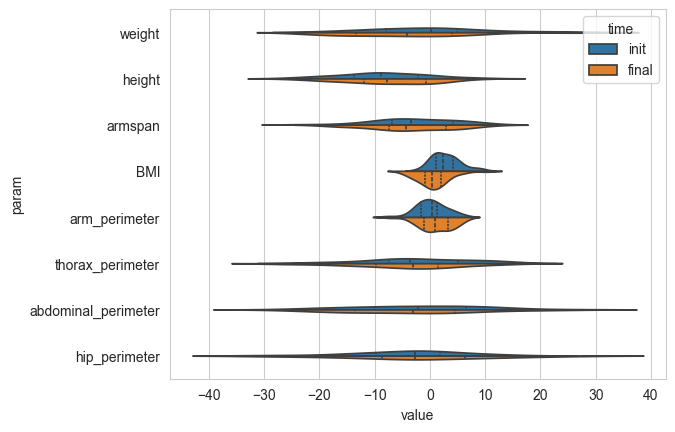

In [209]:
sns.set_style("whitegrid")
sns.violinplot(data=tmocd_melted, x='value', y='param', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

<Axes: xlabel='param', ylabel='value'>

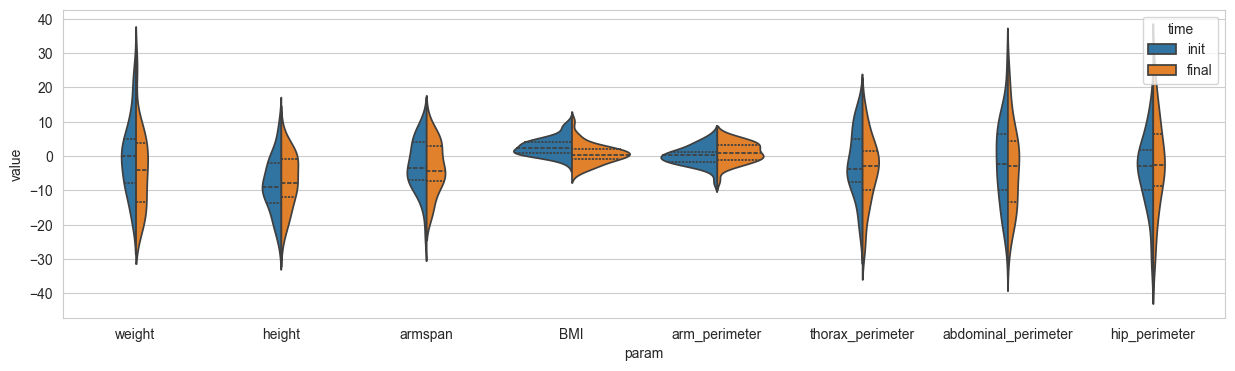

In [225]:
sns.set_style("whitegrid")
mpl.pyplot.figure(figsize=(15,4))
sns.violinplot(data=tmocd_melted, x='param', y='value', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

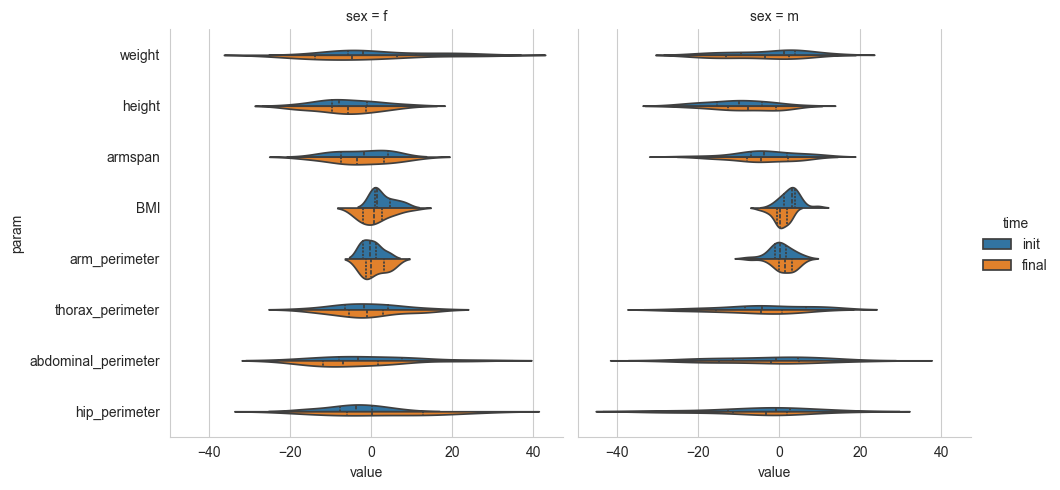

In [213]:
sns.catplot(data=tmocd_melted, x='value', y='param', hue='time', hue_order=['init', 'final'],
            split=True, inner='quart', kind='violin', col='sex')

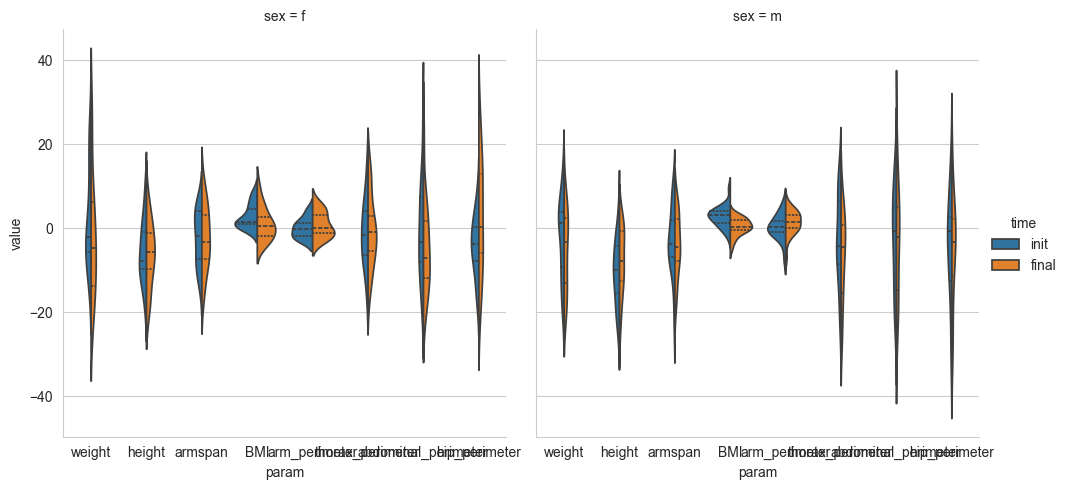

In [221]:
sns.catplot(data=tmocd_melted, x='param', y='value', hue='time', hue_order=['init', 'final'],
            split=True, inner='quart', kind='violin', col='sex')

<Axes: xlabel='sex', ylabel='BMI'>

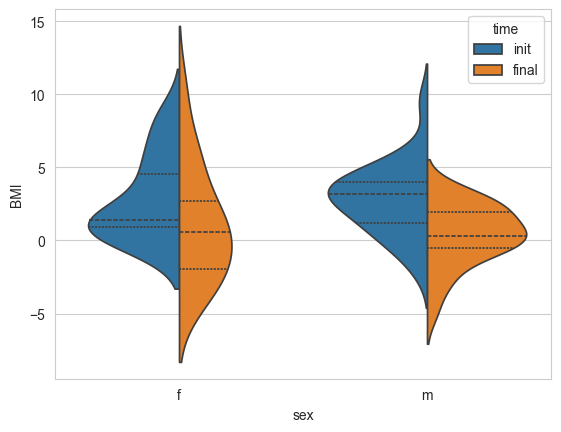

In [208]:
sns.set_style("whitegrid")
sns.violinplot(data=tmocd_pivot, x='sex', y='BMI', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

<Axes: xlabel='sex', ylabel='weight'>

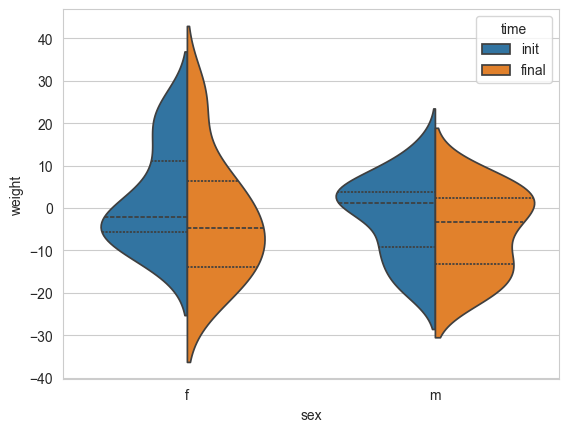

In [214]:
sns.set_style("whitegrid")
sns.violinplot(data=tmocd_pivot, x='sex', y='weight', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

<Axes: xlabel='sex', ylabel='height'>

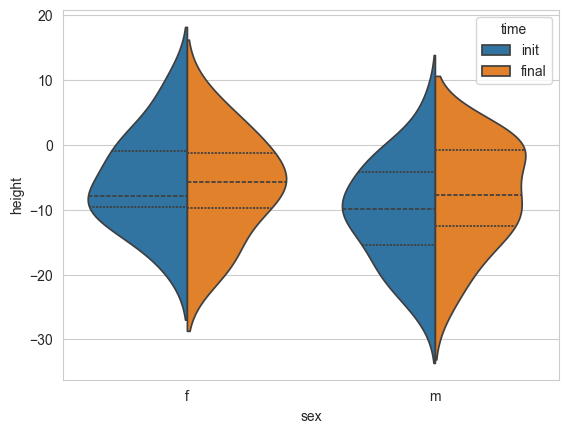

In [215]:
sns.set_style("whitegrid")
sns.violinplot(data=tmocd_pivot, x='sex', y='height', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

<Axes: xlabel='sex', ylabel='armspan'>

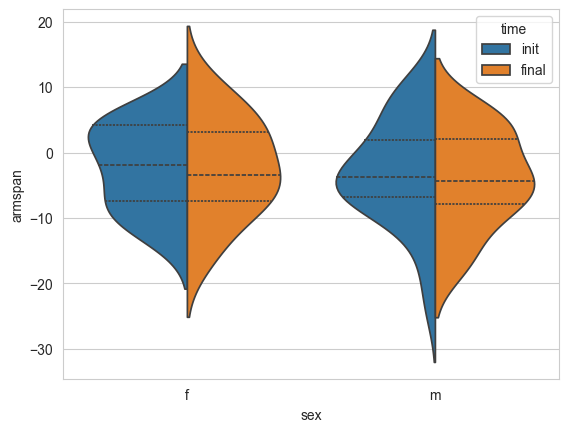

In [216]:
sns.set_style("whitegrid")
sns.violinplot(data=tmocd_pivot, x='sex', y='armspan', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

<Axes: xlabel='sex', ylabel='arm_perimeter'>

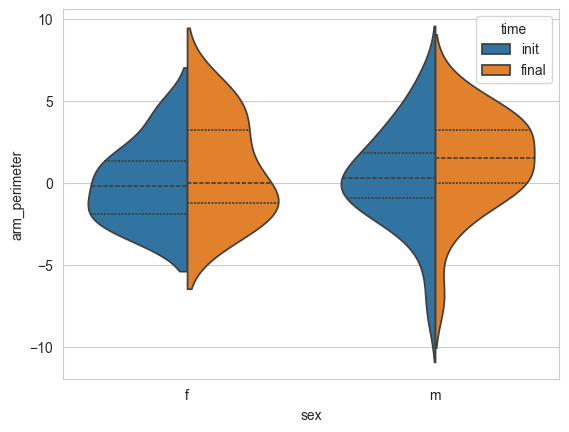

In [217]:
sns.set_style("whitegrid")
sns.violinplot(data=tmocd_pivot, x='sex', y='arm_perimeter', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

<Axes: xlabel='sex', ylabel='thorax_perimeter'>

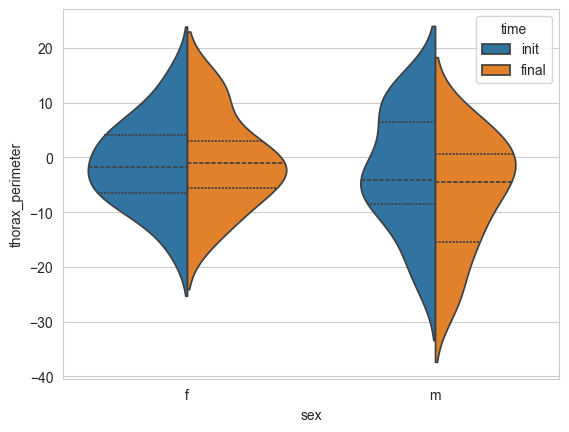

In [218]:
sns.set_style("whitegrid")
sns.violinplot(data=tmocd_pivot, x='sex', y='thorax_perimeter', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

<Axes: xlabel='sex', ylabel='hip_perimeter'>

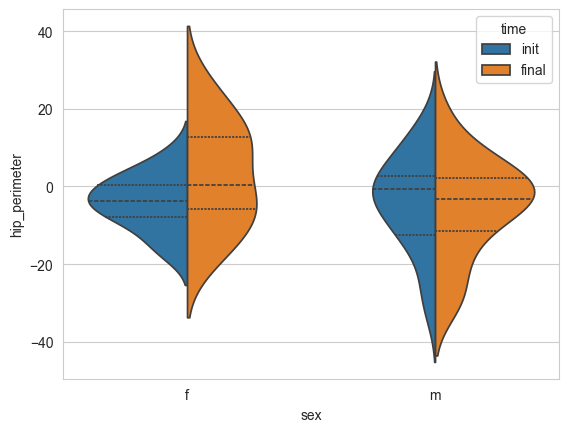

In [227]:
sns.set_style("whitegrid")
sns.violinplot(data=tmocd_pivot, x='sex', y='hip_perimeter', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

In [234]:
tmocd_pivot.columns

Index(['BMI', 'arm_perimeter', 'thorax_perimeter', 'abdominal_perimeter',
       'hip_perimeter'],
      dtype='object', name='param')

In [236]:
[st.ttest_rel(tmocd_pivot[col].loc[tmocd_pivot.time=='init'],
              tmocd_pivot[col].loc[tmocd_pivot.time=='final']) for col in tmocd_pivot.columns[7:]]

[TtestResult(statistic=7.166754599758193, pvalue=1.2664240603745071e-08, df=39),
 TtestResult(statistic=-4.845078034337137, pvalue=2.0395453867764044e-05, df=39),
 TtestResult(statistic=2.2039382115197332, pvalue=0.033498772712172845, df=39),
 TtestResult(statistic=1.4384414963775278, pvalue=0.15828596477349438, df=39),
 TtestResult(statistic=-1.5937575198962215, pvalue=0.11906379698519001, df=39)]

In [239]:
[cohen_glass_hedges(tmocd_pivot[col].loc[tmocd_pivot.time=='init'],
              tmocd_pivot[col].loc[tmocd_pivot.time=='final'])[0] for col in tmocd_pivot.columns[7:]]

[0.7890783255888753,
 -0.3344118538241088,
 0.24807031864266613,
 0.14977413186766111,
 -0.16507087424752337]

In [240]:
[st.levene(tmocd_pivot[col].loc[tmocd_pivot.time=='init'],
              tmocd_pivot[col].loc[tmocd_pivot.time=='final']) for col in tmocd_pivot.columns[7:]]

[LeveneResult(statistic=0.041292414900488954, pvalue=0.8395037040689415),
 LeveneResult(statistic=0.5363109444255025, pvalue=0.46616052314457956),
 LeveneResult(statistic=0.0013573951934288053, pvalue=0.9707044414911252),
 LeveneResult(statistic=0.06190607208618172, pvalue=0.8041622567449312),
 LeveneResult(statistic=2.0482091102969324, pvalue=0.15637986056230618)]

In [243]:
md.columns

Index(['ID', 'group', 'sex', 'birth_year', 'weight_diff', 'height_diff',
       'armspan_diff', 'BMI_diff', 'arm_perimeter_diff',
       'thorax_perimeter_diff', 'abdominal_perimeter_diff',
       'hip_perimeter_diff'],
      dtype='object')

In [251]:
md_flat = md.melt(id_vars=['ID', 'group', 'sex'], value_vars=['weight_diff', 'height_diff',
       'armspan_diff', 'BMI_diff', 'arm_perimeter_diff',
       'thorax_perimeter_diff', 'abdominal_perimeter_diff', 'hip_perimeter_diff'],
       var_name='param', value_name='value')

<Axes: xlabel='param', ylabel='value'>

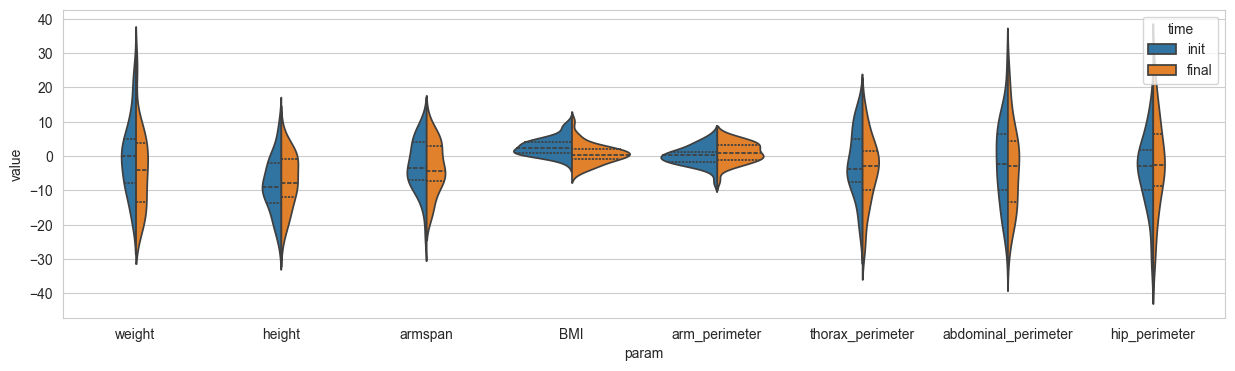

In [255]:
sns.set_style("whitegrid")
mpl.pyplot.figure(figsize=(15,4))
sns.violinplot(data=tmocd_melted, x='param', y='value', hue='time', hue_order=['init', 'final'], split=True, inner='quart')

<Axes: xlabel='param', ylabel='value'>

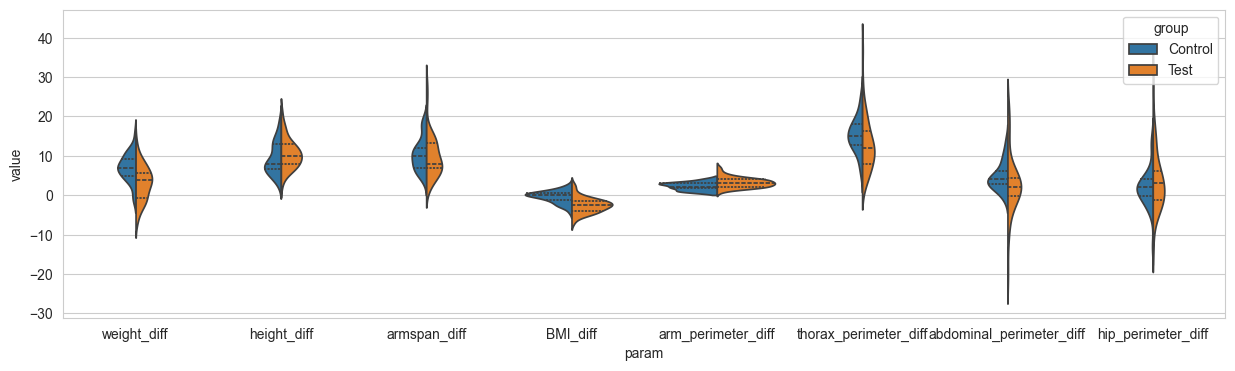

In [254]:
sns.set_style("whitegrid")
mpl.pyplot.figure(figsize=(15,4))
sns.violinplot(data=md_flat, x='param', y='value', hue='group', hue_order=['Control', 'Test'], split=True, inner='quart')